### Getting started...

In this notebook, I examine some questions about the 2018 and 2019 Happiness Index Score, focusing mainly on descriptive analyses. 

To get started, I first load the necessary data. In addition to the Happiness Index Score data from kaggle, I load a file that assigns a continent and a subregion to the countries. 

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# load the data from kaggle

df = pd.read_csv('C:/Users/franz/Documents/udacity/Data/archive/report_2018-2019.csv')

countries_to_continents = pd.read_csv("C:/Users/franz/Documents/udacity/Data/archive/countryContinent.csv", encoding ="ISO-8859-1")

df = df.merge(countries_to_continents, left_on="Country or region", right_on="country", how="left")



Let's first find out which 3 countries have the highest Happiness Index Score and on which continent people are happiest.

In [79]:
print("Top 3 in 2018:")
print(', '.join(df[df["Year"] == 2018].sort_values(by =["Score"],ascending=False)[0:3]["Country or region"]))
print("Top 3 in 2019:")
print(', '.join(df[df["Year"] == 2019].sort_values(by =["Score"],ascending=False)[0:3]["Country or region"]))
print("Lowest 3 in 2018:")
print(', '.join(df[df["Year"] == 2018].sort_values(by =["Score"],ascending=False).tail(3)["Country or region"]))
print("Lowest 3 in 2019:")
print(', '.join(df[df["Year"] == 2019].sort_values(by =["Score"],ascending=False).tail(3)["Country or region"]))

print(df.groupby("continent")["Score"].mean().sort_values())
print(df.groupby("sub_region")["Score"].mean().sort_values())


Top 3 in 2018:
Finland, Norway, Denmark
Top 3 in 2019:
Finland, Denmark, Norway
Lowest 3 in 2018:
South Sudan, Central African Republic, Burundi
Lowest 3 in 2019:
Afghanistan, Central African Republic, South Sudan
continent
Africa      4.334840
Asia        5.307053
Americas    6.080103
Europe      6.277586
Oceania     7.282750
Name: Score, dtype: float64
sub_region
Eastern Africa               4.083778
Southern Africa              4.158444
Middle Africa                4.243111
Western Africa               4.456400
Southern Asia                4.565357
Northern Africa              4.894182
Caribbean                    4.947667
South-Eastern Asia           5.399071
Eastern Asia                 5.438500
Western Asia                 5.483867
Central Asia                 5.581000
Southern Europe              5.659000
Eastern Europe               5.676063
South America                6.122187
Central America              6.325133
Northern Europe              6.941889
Western Europe          

In [80]:
df

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Yemen,YE,YEM,887.0,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087,Zambia,ZM,ZMB,894.0,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082,Zambia,ZM,ZMB,894.0,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089,Zimbabwe,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Eastern Africa,2.0,14.0


**Which variables show the highest correlataion with the Happy Index Score?**

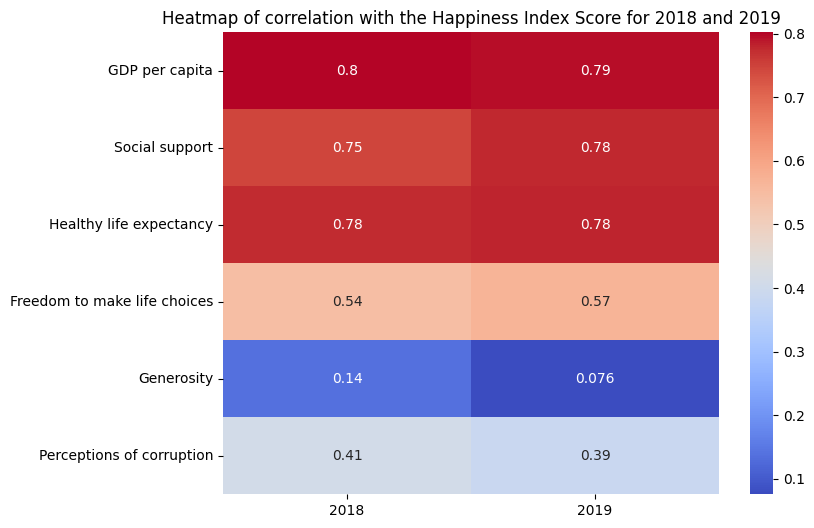

In [81]:
# calculate correlation with the Happy Index Score

corr_2018 = df[df["Year"]==2018][['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].corr()['Score']

corr_2019 = df[df["Year"]==2019][['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].corr()['Score']

data = {'2018': corr_2018, '2019': corr_2019}
correlation_data = pd.DataFrame(data)

# plot the heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.iloc[1:], annot=True, cmap="coolwarm")

plt.title("Heatmap of correlation with the Happiness Index Score for 2018 and 2019")
plt.show()

The correlations hardly differ between the individual years. We see a stable pattern. GDP per capita score, the social support and the healthy life expectancy are highly correlated with the Happiness Index Score. 

**Which variables have an impact on the Happiness Index Score?**

In [84]:
#Split into explanatory and response variables
X = df[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
y = df['Score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.8004328566480369.  The rsquared on the test data was 0.7180277588539534.


The model works quite well on the test data, even compared to the training data. So there is no strong evidence of overfitting. 

Let's have a look at the coefficients:

In [88]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
best_three = ', '.join(coef_df.est_int[0:3])


print("The analysis suggests that {} are the three most important factors in predicting Happiness Index scores.".format(best_three)) 

The analysis suggests that Freedom to make life choices, GDP per capita, Healthy life expectancy are the three most important factors in predicting Happiness Index scores.


In this analysis, we have considered both years together. However, do the factors differ from year to year? This is the question we want to explore next. 

In [94]:
## 2018 data
X = df[df["Year"]==2018][[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
y = df[df["Year"]==2018]['Score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

coef_df_2018 = coef_weights(lm_model.coef_, X_train)


## 2018 data
X = df[df["Year"]==2019][[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
y = df[df["Year"]==2019]['Score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

coef_df_2019 = coef_weights(lm_model.coef_, X_train)

print(coef_df_2018)
print(coef_df_2019)


                        est_int     coefs  abs_coefs
0                GDP per capita  1.363412   1.363412
4                    Generosity  1.167713   1.167713
3  Freedom to make life choices  1.153741   1.153741
1                Social support  1.062241   1.062241
5     Perceptions of corruption  0.829761   0.829761
2       Healthy life expectancy  0.469867   0.469867
                        est_int     coefs  abs_coefs
1                Social support  1.402305   1.402305
3  Freedom to make life choices  1.297711   1.297711
2       Healthy life expectancy  1.149851   1.149851
0                GDP per capita  0.832268   0.832268
5     Perceptions of corruption  0.831542   0.831542
4                    Generosity  0.435418   0.435418


In [109]:
df_2018 = df[df['Year']==2018]
df_2018.set_index("Country or region", inplace=True)
df_2019 = df[df['Year']==2019]
df_2019.set_index("Country or region", inplace=True)

difference_generosity = df_2018.Generosity - df_2019.Generosity 
abs(difference_generosity).sort_values().tail(20)

Country or region
Syria                     0.045
Turkmenistan              0.045
Bosnia and Herzegovina    0.047
Lebanon                   0.048
Honduras                  0.049
Finland                   0.049
Malaysia                  0.051
Sri Lanka                 0.063
United Arab Emirates      0.076
United Kingdom            0.086
Taiwan                    0.091
Israel                    0.093
Angola                      NaN
Belize                      NaN
Comoros                     NaN
Gambia                      NaN
Macedonia                   NaN
North Macedonia             NaN
Sudan                       NaN
Swaziland                   NaN
Name: Generosity, dtype: float64

In [110]:
df[df["Country or region"]=="Sudan"]

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
262,137,Sudan,2018,4.139,0.605,1.24,0.312,0.016,0.134,0.082,Sudan,SD,SDN,729.0,ISO 3166-2:SD,Africa,Northern Africa,2.0,15.0
